In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import firm_revised


In [282]:
np.random.seed(100)

In [2]:
# Trying to see how sensitive computed market shares are to the initialized parameters
# All the parameters of interest 
beta = np.array([0.5, -1.7, -0.3])
mu = 0.5
omega = 1

# alpha = -np.exp(mu + omega**2/2)

# The number of firms in the market
J = 10

# The numnber of product characteristics 
K = 2

X1 = np.random.uniform(6, 24, size=J)
X2 = np.random.normal(3, 1, size=J)
all_X = np.column_stack((X1, X2))
X0 = np.ones(J)
X = np.column_stack((X0, all_X))

p = np.ones(J)

In [328]:
mean_share_constant = []
outside_good_share_constant = []

constant = [x / 100 for x in range(-1000, 1000, 1)]



for b in constant: 
    beta[0] = b
    shares = share(p, X, beta, alpha, e)
    # print(f"This is the {b} for this market share outside good {1 - sum(shares)}")
    shares = np.around(shares, decimals=2, out=None)
    mean_share_constant.append(np.mean(shares))
    outside_good_share_constant.append(1 - sum(shares))



This is the -10.0 for this market share outside good0.9990953248144568
This is the -9.99 for this market share outside good0.9990862409857072
This is the -9.98 for this market share outside good0.9990770660306392
This is the -9.97 for this market share outside good0.9990677990368005
This is the -9.96 for this market share outside good0.9990584390826371
This is the -9.95 for this market share outside good0.9990489852374025
This is the -9.94 for this market share outside good0.9990394365610672
This is the -9.93 for this market share outside good0.9990297921042263
This is the -9.92 for this market share outside good0.9990200509080074
This is the -9.91 for this market share outside good0.9990102120039765
This is the -9.9 for this market share outside good0.9990002744140436
This is the -9.89 for this market share outside good0.9989902371503669
This is the -9.88 for this market share outside good0.998980099215257
This is the -9.87 for this market share outside good0.9989698596010786
This is 

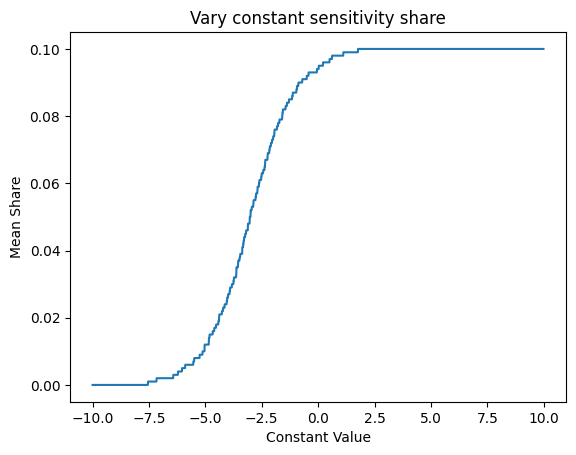

In [329]:
# create line graph
plt.plot(constant, mean_share_constant)

# add title and labels
plt.title('Vary constant sensitivity share')
plt.xlabel('Constant Value')
plt.ylabel('Mean Share')

# show the graph
plt.show()

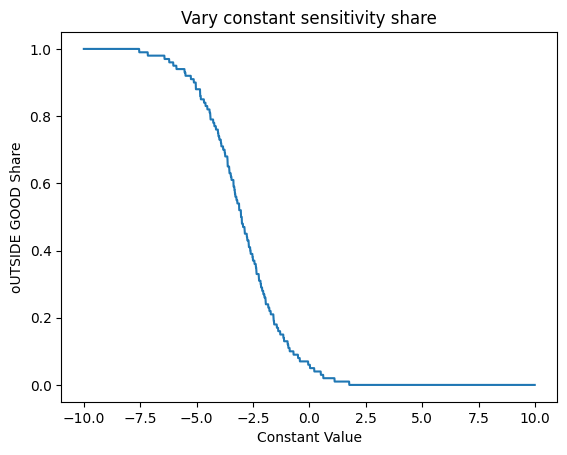

In [330]:
# create line graph
plt.plot(constant, outside_good_share_constant)

# add title and labels
plt.title('Vary constant sensitivity share')
plt.xlabel('Constant Value')
plt.ylabel('oUTSIDE GOOD Share')

# show the graph
plt.show()

In [331]:
mean_share_b1 = []
outside_good_share_b1 = []

b1 = [x / 100 for x in range(-500, 10, 10)]


for b in b1: 
    beta[1] = b
    shares = share(p, X, beta, alpha, e)
    shares = np.around(shares, decimals=2, out=None)
    mean_share_b1.append(np.mean(shares))
    outside_good_share_b1.append(1 - sum(shares))

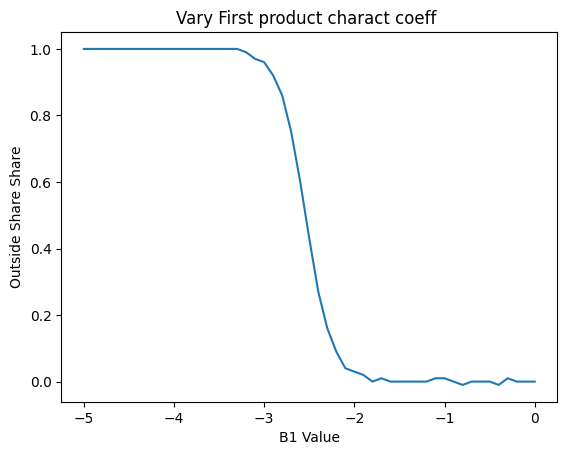

In [332]:
# create line graph
plt.plot(b1, outside_good_share_b1)

# add title and labels
plt.title('Vary First product charact coeff ')
plt.xlabel('B1 Value')
plt.ylabel('Outside Share Share')

# show the graph
plt.show()

In [333]:
mean_share_b2 = []
outside_good_share_b2 = []

b2 = [x / 100 for x in range(-500, 1000, 10)]


for b in b2: 
    beta[2] = b
    shares = share(p, X, beta, alpha, e)
    outside_good_share_b2.append(1 - sum(shares))

    shares = np.around(shares, decimals=2, out=None)
    mean_share_b2.append(np.mean(shares))


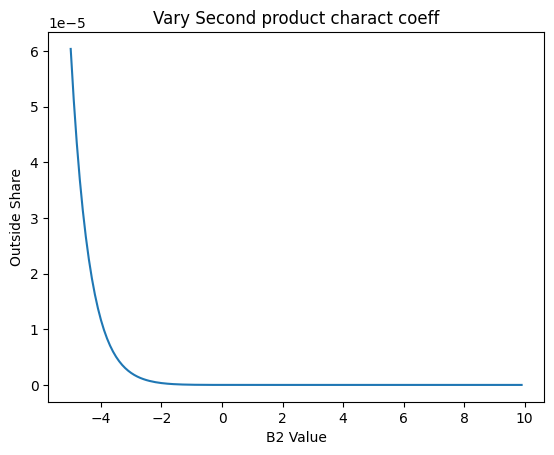

In [334]:
# create line graph
plt.plot(b2, outside_good_share_b2)

# add title and labels
plt.title('Vary Second product charact coeff')
plt.xlabel('B2 Value')
plt.ylabel('Outside Share')

# show the graph
plt.show()

In [294]:
# Now looking at the product characteritics and what happends with the produt 

mean_share_caract = []
outside_good_share_caract = []

seed = range(1, 100, 10)

for s in seed: 
    all_Xj = np.random.uniform(3, 4, size=(J, K))
    X = np.column_stack((X0, all_Xj))
    shares = share(p, X, beta, alpha, e)
    shares = np.around(shares, decimals=2, out=None)
    print(shares)
    mean_share_caract.append(np.mean(shares))
    outside_good_share_caract.append(1 - sum(shares))


[0.   0.09 0.01 0.   0.   0.59 0.24 0.06 0.01 0.  ]
[0.07 0.   0.54 0.   0.   0.   0.   0.   0.02 0.36]
[0.03 0.   0.   0.   0.85 0.09 0.   0.01 0.01 0.  ]
[0.42 0.   0.03 0.   0.01 0.   0.   0.32 0.06 0.15]
[0.02 0.6  0.   0.35 0.   0.01 0.   0.01 0.01 0.  ]
[0.   0.   0.   0.27 0.   0.01 0.44 0.   0.   0.27]
[0.89 0.   0.   0.02 0.01 0.01 0.   0.   0.01 0.06]
[0.   0.04 0.   0.01 0.86 0.01 0.   0.07 0.   0.  ]
[0.   0.13 0.   0.6  0.01 0.06 0.   0.   0.   0.19]
[0.   0.   0.56 0.   0.   0.31 0.01 0.   0.   0.12]


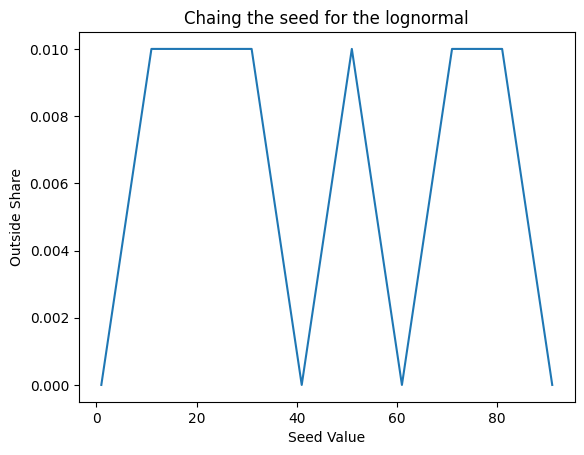

In [295]:
# create line graph
plt.plot(seed, outside_good_share_caract)

# add title and labels
plt.title('Chaing the seed for the lognormal')
plt.xlabel('Seed Value')
plt.ylabel('Outside Share')

# show the graph
plt.show()

In [ ]:
# For some reason the fact that there are differenrt error terms ufcks up the estimation of the 
# Monte Carlo stuff 